In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate 
%matplotlib notebook

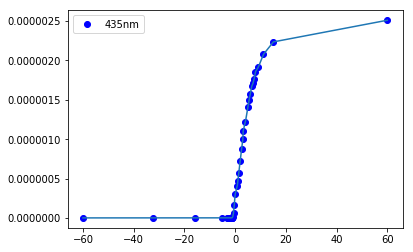

In [5]:

df = pd.read_csv('PEEBlue.csv')

#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'bo')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfBlue = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

fBlue = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - fBlue(df2['applied'].values)
corryBlue = correctedy
 
interpBlue = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 1)
blues = df2['applied'].values
#plt.plot(df2['applied'].values, df2['meter'].values, 'bo')
plt.plot(df2['applied'].values, correctedy, 'bo')
plt.legend(['435nm'])

plt.plot(linex, interpBlue(linex))
#plt.plot(linex,fBlue(linex),'-k')


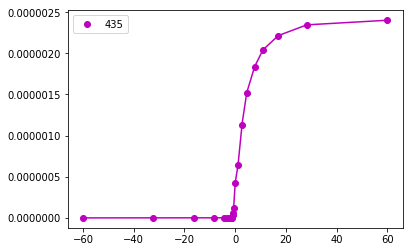

In [6]:
df = pd.read_csv('PEEViolate.csv')



#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfViolate = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corryviolate = correctedy
#plt.plot(df2['applied'].values, df2['meter'].values, 'ro')

interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 2)

corryviolate = corryviolate * interpBlue(20)/interp(20)

interpViolate = scipy.interpolate.interp1d(df2['applied'].values, corryviolate, 1)
violates = df2['applied'].values

plt.plot(df2['applied'].values, corryviolate, 'mo')
plt.legend(['435','404nm'])

#plt.plot(df2['applied'].values, df2['meter'].values, 'mo')


#plt.plot(linex,f(linex),'-k')
plt.plot(linex, interpViolate(linex), 'm-')

#plt.axhline()


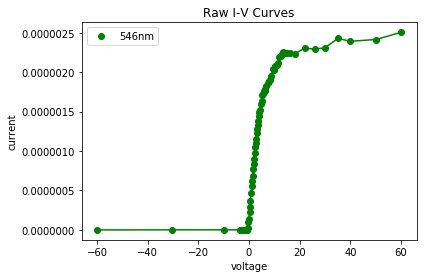

In [7]:
df = pd.read_csv('PEEGreen.csv')



#x = df['V applied (mV)'] * 10**(-3)  #convert to V

x = df['V applied']
xr = df['V applied reverse']
y = df['V meter avg'] * 11.12**(-6) #convert to current I where Omega = 11.12 MegaOmhs
yr = df['V meter avg reverse (mV)'] * 10**(-9) #convert to I where Omega = 10 MegaOmhs

#plt.plot(x,y, 'bo')
#plt.plot(xr, yr, 'ro')
#plt.title("I-V curve")
#plt.ylabel("current (I)")

#plt.xlabel("Voltage applied")
#plt.axhline()

xdata = []
for i in reversed(xr.values):
    xdata.append(i)

for i in (x.values):
    xdata.append(i)

ydata = []
for i in reversed(yr.values):
    ydata.append(i)

for i in (y.values):
    ydata.append(i)

xdata = pd.Series(xdata)
xdata = xdata.dropna()
ydata = pd.Series(ydata)
ydata = ydata.dropna()

df2 = pd.DataFrame([xdata,ydata]).T
df2 = df2.reset_index(drop=True)
df2 = df2.rename(columns= {0 : 'applied', 1 : 'meter'})
dfGreen = df2


df_forRegress = df2.iloc[0:7]
df_forRegress

m, b = np.polyfit(df_forRegress['applied'], df_forRegress['meter'],deg=1)

f = lambda x: m*x + b
linex = np.linspace(-60,60,1000)
correctedy = df2['meter'].values - f(df2['applied'].values)
corrygreen = correctedy
#plt.plot(df2['applied'].values, df2['meter'].values, 'ro')
interp = scipy.interpolate.interp1d(df2['applied'].values, correctedy, 2)

corrygreen = corrygreen * interpBlue(20)/interp(20)
interpGreen = scipy.interpolate.interp1d(df2['applied'].values, corrygreen, 1)

greens = df2['applied'].values
plt.plot(df2['applied'].values, corrygreen, 'go')
#plt.plot(df2['applied'].values, df2['meter'].values, 'go')

plt.title('Raw I-V Curves')
plt.legend(['546nm'])
plt.ylabel('current')
plt.xlabel('voltage')
#plt.plot(linex,f(linex),'-k')
plt.plot(linex, interpGreen(linex), 'g-')

#plt.axhline()
#plt.savefig('correcteddata.png')


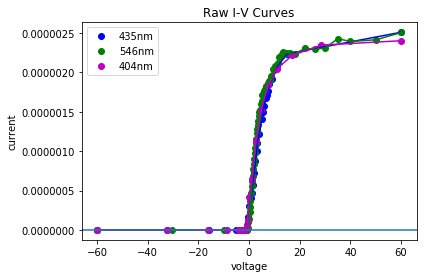

In [8]:
plt.plot(blues, corryBlue, 'bo')
plt.plot(greens, corrygreen, 'go')
plt.plot(violates, corryviolate, 'mo')

plt.title('Raw I-V Curves')
plt.ylabel('current')
plt.xlabel('voltage')
plt.legend(['435nm','546nm','404nm'])

plt.plot(linex, interpBlue(linex), 'b-')
plt.plot(linex, interpGreen(linex), 'g-')
plt.plot(linex, interpViolate(linex), 'm-')

plt.axhline()


In [19]:
plt.savefig('correct.png')


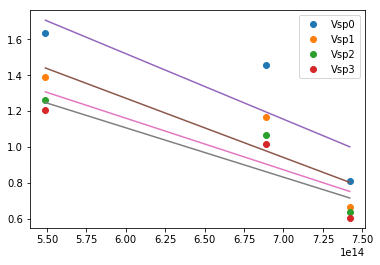

In [9]:
c =299792458

blue = []
green = []
violate = []

interpViolate = scipy.interpolate.interp1d(corryviolate, -dfViolate['applied'].values, 1)
interpBlue = scipy.interpolate.interp1d( corryBlue, -dfBlue['applied'].values, 1)
interpGreen = scipy.interpolate.interp1d(corrygreen, -dfGreen['applied'].values, 1)

Ix = np.linspace(.01*10**-7, .1*10**-7, 4)

for i in Ix:
    #blue.append(fBlue(i))
    #green.append(fGreen(i))
    #violate.append(fViolate(i))
    blue.append(interpBlue(i))
    green.append(interpGreen(i))
    violate.append(interpViolate(i))

df3 = pd.DataFrame([blue, violate, green], index=('blue', 'green', 'violate'))
nu = [c/(435*10**-9), c/(546*10**-9), c/(404*10**-9)]

Vsp0m, Vsp0b = np.polyfit(nu, df3[0].values, 1)
Vsp1m, Vsp1b = np.polyfit(nu, df3[1].values, 1)
Vsp2m, Vsp2b = np.polyfit(nu, df3[2].values, 1)
Vsp3m,Vsp3b = np.polyfit(nu, df3[3].values, 1)
fVsp0 = lambda x: x*Vsp0m + Vsp0b
fVsp1 = lambda x: x*Vsp1m + Vsp1b
fVsp2 = lambda x: x*Vsp2m + Vsp2b
fVsp3 = lambda x: x*Vsp3m + Vsp3b

nuspace = np.linspace(min(nu), max(nu), 10)
plt.plot(nu, df3.values, 'o')
plt.plot(nuspace, fVsp0(nuspace),'-')
plt.plot(nuspace, fVsp1(nuspace),'-')
plt.plot(nuspace, fVsp2(nuspace),'-')
plt.plot(nuspace, fVsp3(nuspace),'-')
plt.legend(['Vsp0','Vsp1','Vsp2','Vsp3'])

In [10]:
h = 6.62607004 * 10**-34
h0 = (Vsp0m * -1.602*10**-19)
h1 = (Vsp1m * -1.602*10**-19)
h2 = (Vsp2m * -1.602*10**-19)
h3 = (Vsp3m * -1.602*10**-19)

print(h0, h1, h2, h3)
havg = (h0+ h1+ h2+ h3)/ 4
print("percent error for planks const",(h- havg)/h)



5.864328766247204e-34 5.300671787235567e-34 4.614386658726541e-34 4.420607530258656e-34
percent error for planks const 0.2378591449937357
